# Installing and Importing

In [1]:
%pip install mlflow

  Using cached pytz-2023.4-py2.py3-none-any.whl.metadata (22 kB)
  Using cached importlib_metadata-7.0.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached zipp-3.17.0-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 2.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.3/101.3 kB 1.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 1.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
Using cached importlib_metadata-7.0.1-py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 2.1 MB/s eta 0:00:0000:0100:01
Using cached pytz-2023.4-py2.py3-none-any.whl (506 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 1.6 

In [1]:
# Install necessary packages
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor

/tmp/ipykernel_69406/68418150.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [65]:
Churn_train_df=pd.read_csv('./train.csv')
Churn_test_df=pd.read_csv('./test.csv')

Churn_train_df['Gender'] = Churn_train_df['Gender'].astype('category')
Churn_train_df['family_history_with_overweight'] = Churn_train_df['family_history_with_overweight'].astype('category')
Churn_train_df['FAVC'] = Churn_train_df['FAVC'].astype('category')
Churn_train_df['CAEC'] = Churn_train_df['CAEC'].astype('category')
Churn_train_df['SMOKE'] = Churn_train_df['SMOKE'].astype('category')
Churn_train_df['SCC'] = Churn_train_df['SCC'].astype('category')
Churn_train_df['CALC'] = Churn_train_df['CALC'].astype('category')
Churn_train_df['MTRANS'] = Churn_train_df['MTRANS'].astype('category')
Churn_train_df['NObeyesdad'] = Churn_train_df['NObeyesdad'].astype('category')

Churn_test_df['Gender'] = Churn_test_df['Gender'].astype('category')
Churn_test_df['family_history_with_overweight'] = Churn_test_df['family_history_with_overweight'].astype('category')
Churn_test_df['FAVC'] = Churn_test_df['FAVC'].astype('category')
Churn_test_df['CAEC'] = Churn_test_df['CAEC'].astype('category')
Churn_test_df['SMOKE'] = Churn_test_df['SMOKE'].astype('category')
Churn_test_df['SCC'] = Churn_test_df['SCC'].astype('category')
Churn_test_df['CALC'] = Churn_test_df['CALC'].astype('category')
Churn_test_df['MTRANS'] = Churn_test_df['MTRANS'].astype('category')

Churn_train_df=Churn_train_df.drop(columns='id')
Churn_test_df=Churn_test_df.drop(columns='id')

Churn_train_df.to_csv('./clean_train_df.csv',index=False)
Churn_test_df.to_csv('./clean_test_df.csv',index=False)

# EDA

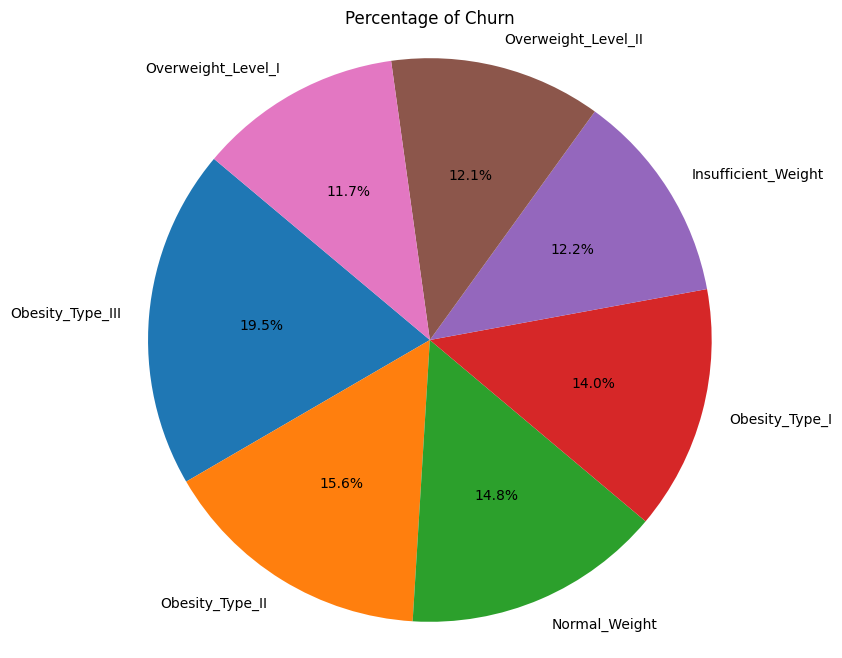

In [37]:
percentage_churn = Churn_train_df["NObeyesdad"].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(percentage_churn, labels=percentage_churn.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Churn')
plt.axis('equal')
plt.show()



In [7]:
# Churn_train_df.isna().sum()

In [8]:
# Churn_train_df.nunique()

In [9]:
# Churn_train_df.info()

In [10]:
# Churn_train_df.describe(include=np.number).T

In [11]:
# Churn_train_df.describe(exclude=np.number).T

Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad

In [12]:
Churn_train_df['Gender'] = Churn_train_df['Gender'].astype('category')
Churn_train_df['family_history_with_overweight'] = Churn_train_df['family_history_with_overweight'].astype('category')
Churn_train_df['FAVC'] = Churn_train_df['FAVC'].astype('category')
Churn_train_df['CAEC'] = Churn_train_df['CAEC'].astype('category')
Churn_train_df['SMOKE'] = Churn_train_df['SMOKE'].astype('category')
Churn_train_df['SCC'] = Churn_train_df['SCC'].astype('category')
Churn_train_df['CALC'] = Churn_train_df['CALC'].astype('category')
Churn_train_df['MTRANS'] = Churn_train_df['MTRANS'].astype('category')
Churn_train_df['NObeyesdad'] = Churn_train_df['NObeyesdad'].astype('category')

### Histplot for Numarical Features

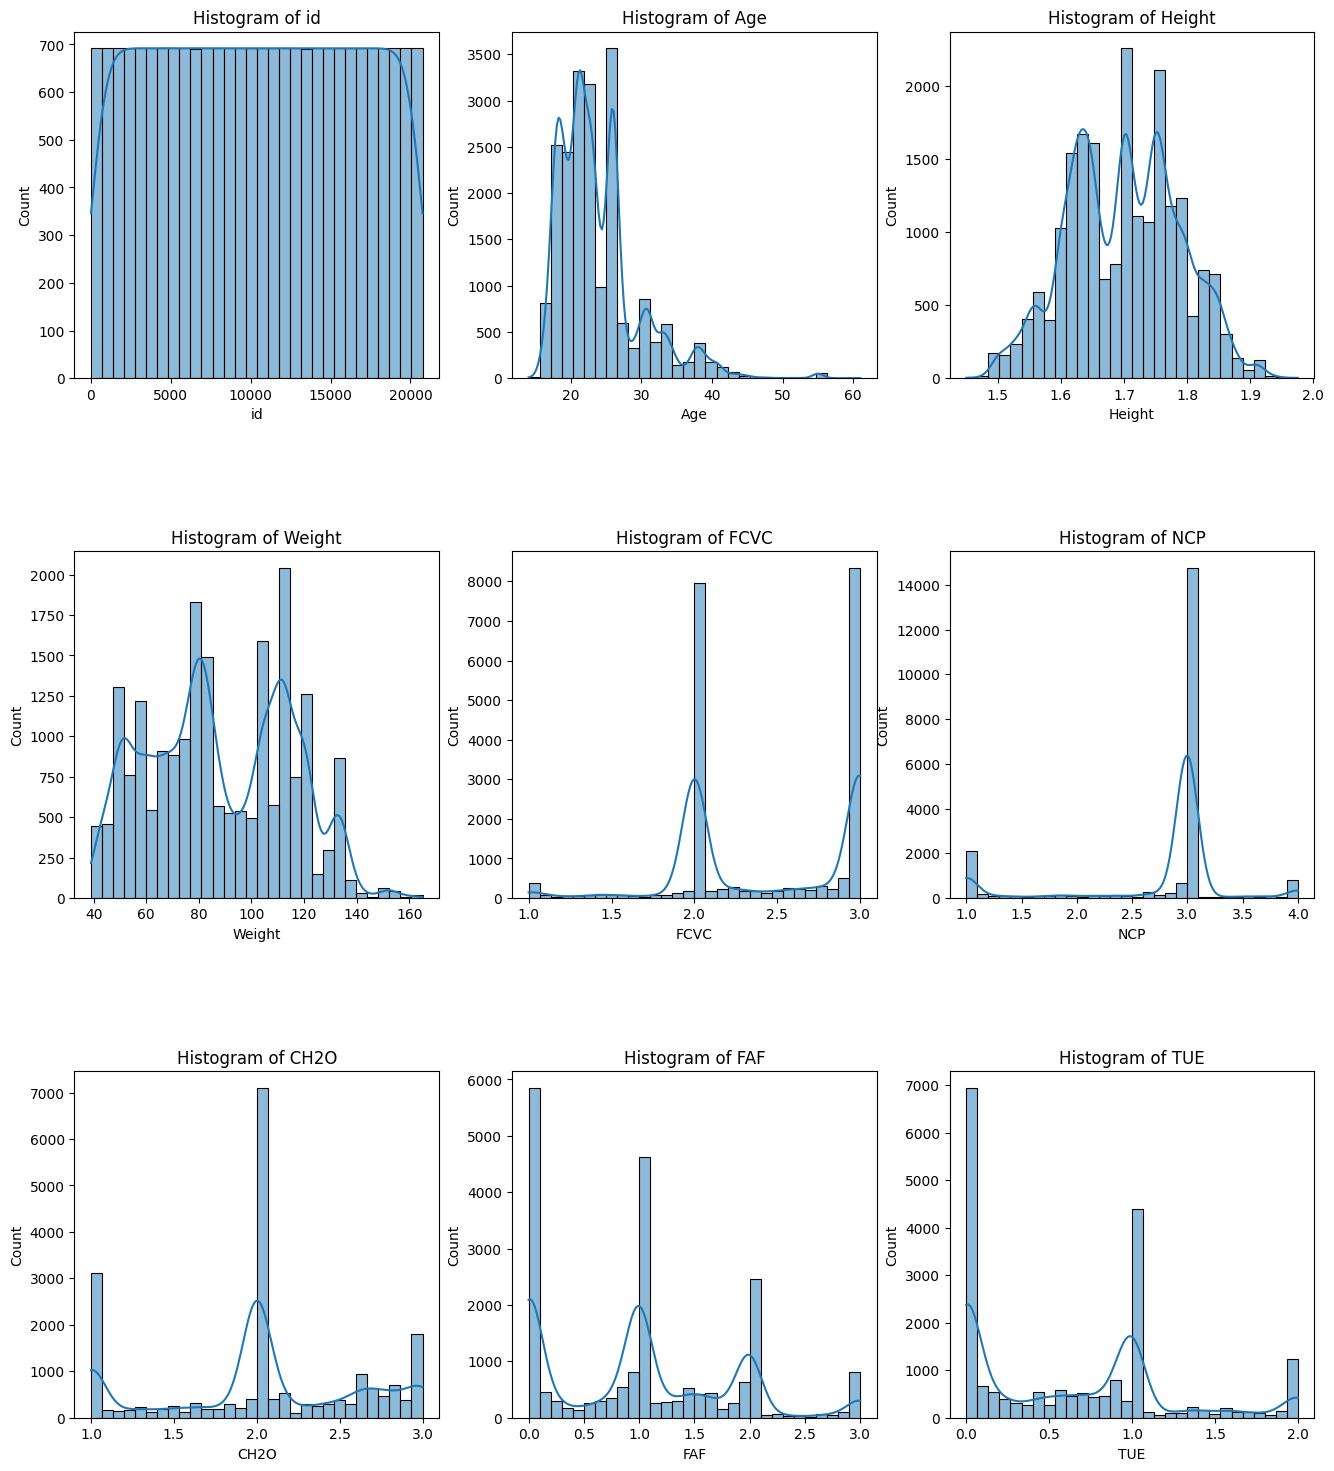

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

features = Churn_train_df.describe(include=np.number).columns

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms with different colors for 'Churn' status
for i, feature in enumerate(features):
    sns.histplot(data=Churn_train_df, x=feature, bins=30, kde=True, multiple="stack", ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)

plt.show()


### Count Plots for Categorical Features

Gender               Female   Male    All
NObeyesdad                               
Insufficient_Weight    1621    902   2523
Normal_Weight          1660   1422   3082
Obesity_Type_I         1267   1643   2910
Obesity_Type_II           8   3240   3248
Obesity_Type_III       4041      5   4046
Overweight_Level_I     1070   1357   2427
Overweight_Level_II     755   1767   2522
All                   10422  10336  20758


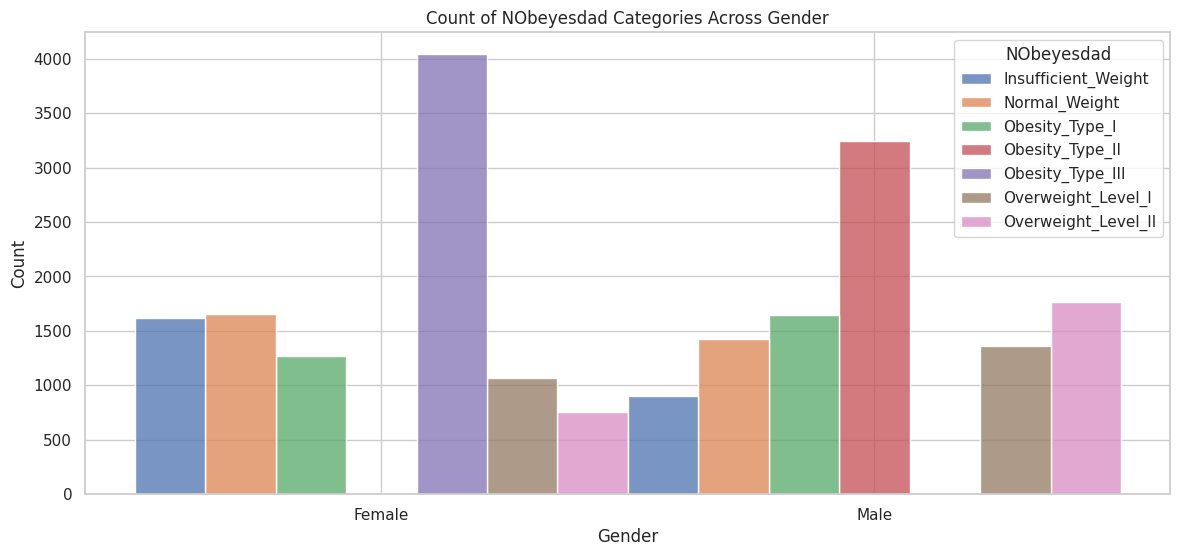

In [39]:
cross_tab = pd.crosstab(Churn_train_df["Gender"], Churn_train_df['NObeyesdad'], margins=True).T

print(cross_tab)

sns.set_theme(style='whitegrid')

plt.figure(figsize=(14, 6))
sns.histplot(data=Churn_train_df, x="Gender", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of NObeyesdad Categories Across Gender')
plt.show()


In [15]:
# cross_tab = pd.crosstab(Churn_train_df["family_history_with_overweight"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="family_history_with_overweight", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('family_history_with_overweight')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across family_history_with_overweight')
# plt.show()


In [16]:
# cross_tab = pd.crosstab(Churn_train_df["FAVC"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="FAVC", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('FAVC')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across FAVC')
# plt.show()


In [17]:
# cross_tab = pd.crosstab(Churn_train_df["CAEC"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="CAEC", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('CAEC')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across CAEC')
# plt.show()


In [18]:
# cross_tab = pd.crosstab(Churn_train_df["SMOKE"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="SMOKE", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('SMOKE')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across SMOKE')
# plt.show()


In [19]:
# cross_tab = pd.crosstab(Churn_train_df["SCC"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="SCC", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('SCC')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across SCC')
# plt.show()



In [20]:
# cross_tab = pd.crosstab(Churn_train_df["CALC"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="CALC", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('CALC')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across CALC')
# plt.show()

In [21]:
# cross_tab = pd.crosstab(Churn_train_df["MTRANS"], Churn_train_df['NObeyesdad'], margins=True).T

# print(cross_tab)

# sns.set_theme(style='whitegrid')

# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="MTRANS", hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
# plt.xlabel('MTRANS')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across MTRANS')
# plt.show()

In [22]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Print value counts for 'NObeyesdad' column
# print(Churn_train_df['NObeyesdad'].value_counts())

# # Set Seaborn theme
# sns.set_theme(style='whitegrid')

# # Plot histogram
# plt.figure(figsize=(14, 6))
# sns.histplot(data=Churn_train_df, x="NObeyesdad", hue='NObeyesdad', bins='auto', element='bars', legend=False)

# # Rotate x-axis labels
# plt.xticks(rotation=45)

# plt.xlabel('NObeyesdad')
# plt.ylabel('Count')
# plt.title('Count of NObeyesdad Categories Across NObeyesdad')
# plt.show()


In [23]:
# categorical_features = Churn_train_df.describe(exclude=np.number).columns

# # Set up subplots
# fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(12, 50))
# fig.subplots_adjust(hspace=0.5)

# # Flatten the axes for easier iteration
# axes = axes.flatten()

# # Plot count plots
# for i, feature in enumerate(categorical_features):
#     sns.countplot(data=Churn_train_df, x=feature, ax=axes[i],hue='NObeyesdad')
#     axes[i].set_title(f'Count Plot of {feature}')
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Count')

# plt.show()


In [24]:
# Churn_train_df.columns

In [25]:
# # Create transformers
# ordinal_encoder_transformer = OrdinalEncoderTransformer(columns=categorical_features)
# label_encoder_transformer = LabelEncoderTransformer(target_column='Churn')

In [26]:
# # Transform the training set
# # Churn_train_df_labels = label_encoder_transformer.fit_transform(Churn_train_df['Churn'])
# Churn_train_df_features = ordinal_encoder_transformer.fit_transform(Churn_train_df)

# # Concatenate the labels and features back together
# Churn_train_df_transformed = pd.DataFrame(Churn_train_df_features)


In [27]:
# Churn_train_df_transformed["NObeyesdad"].mean()

In [28]:
# Churn_train_df_transformed[Churn_train_df_transformed["NObeyesdad"] == 6].mean()

In [58]:
num_fea=Churn_train_df.describe(include=np.number).columns

In [60]:
correlation_matrix = Churn_train_df(num_fea).corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

TypeError: 'DataFrame' object is not callable

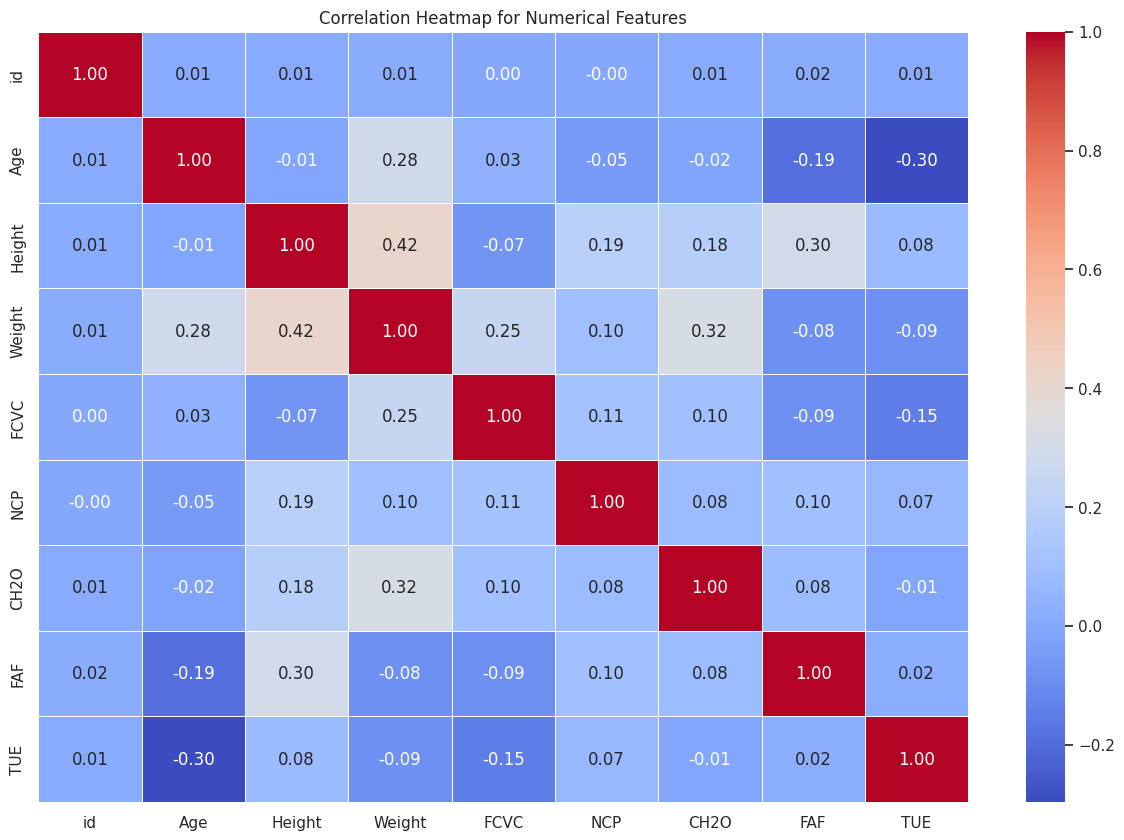

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get DataFrame containing only numerical features
numerical_df = Churn_train_df[num_fea]

# Calculate correlation matrix for numerical features
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


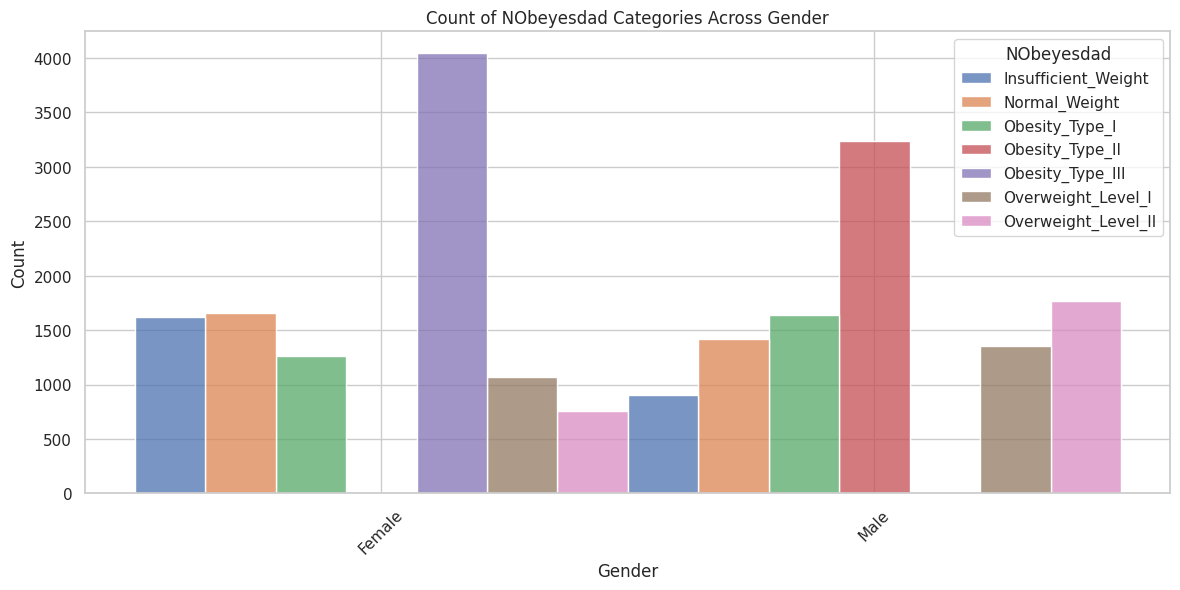

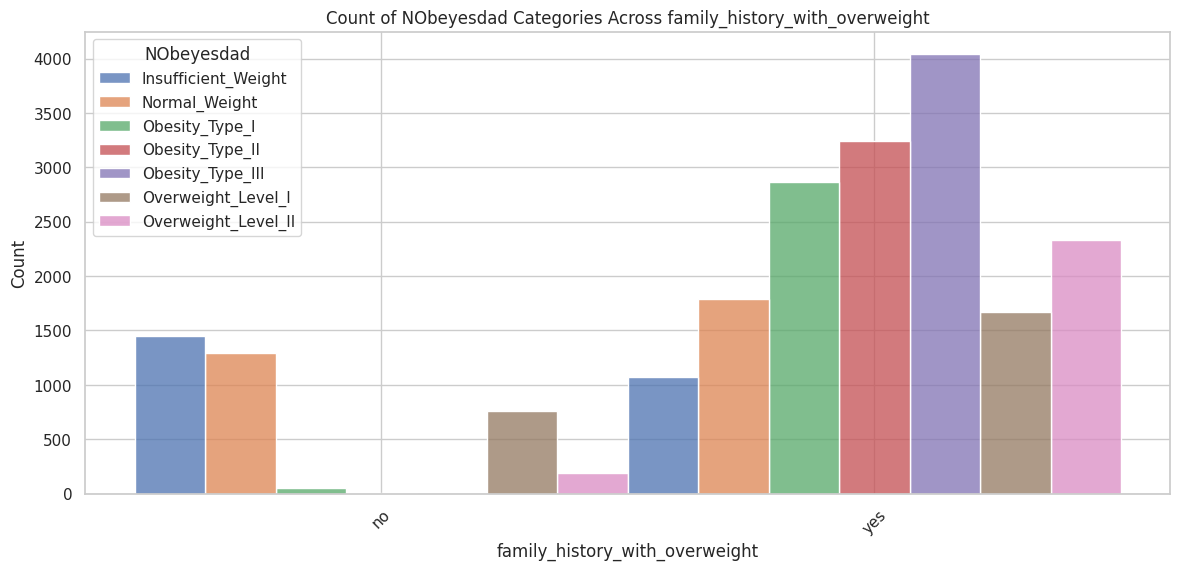

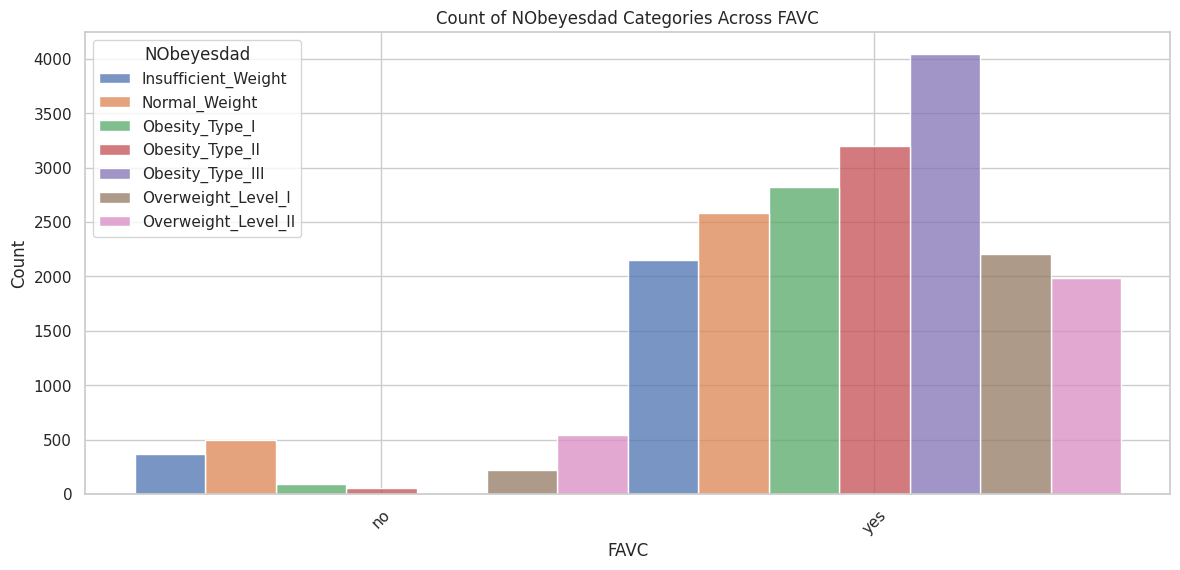

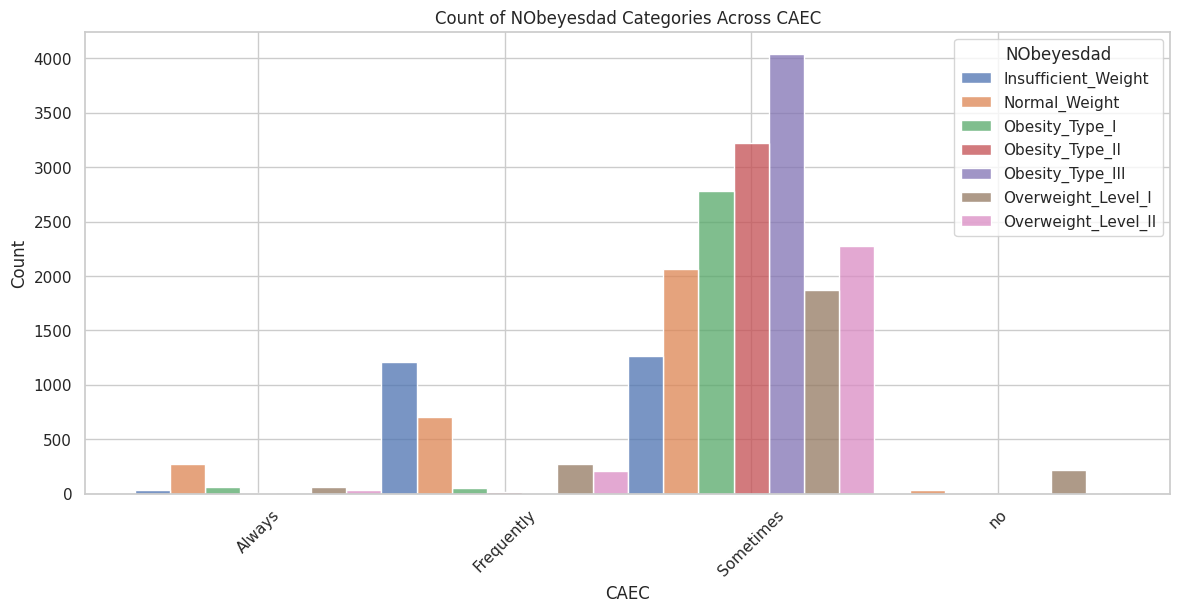

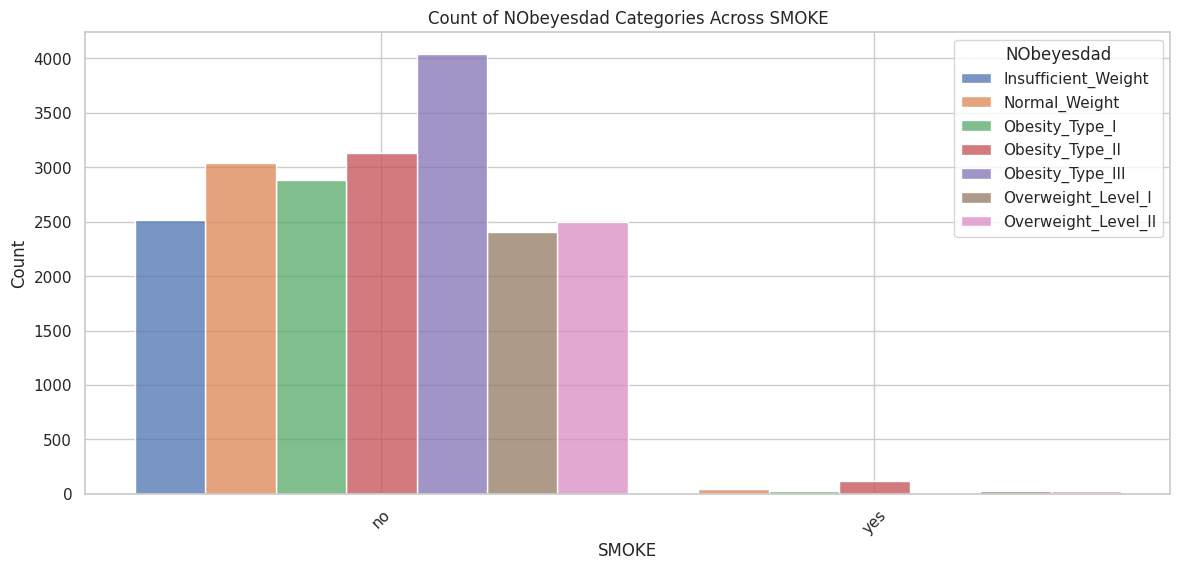

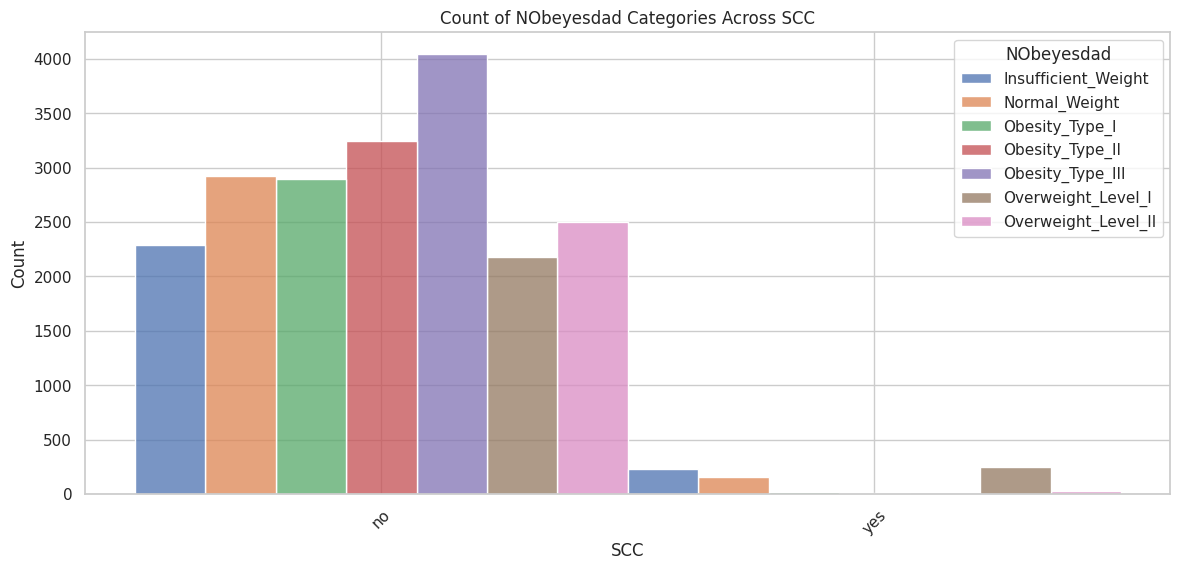

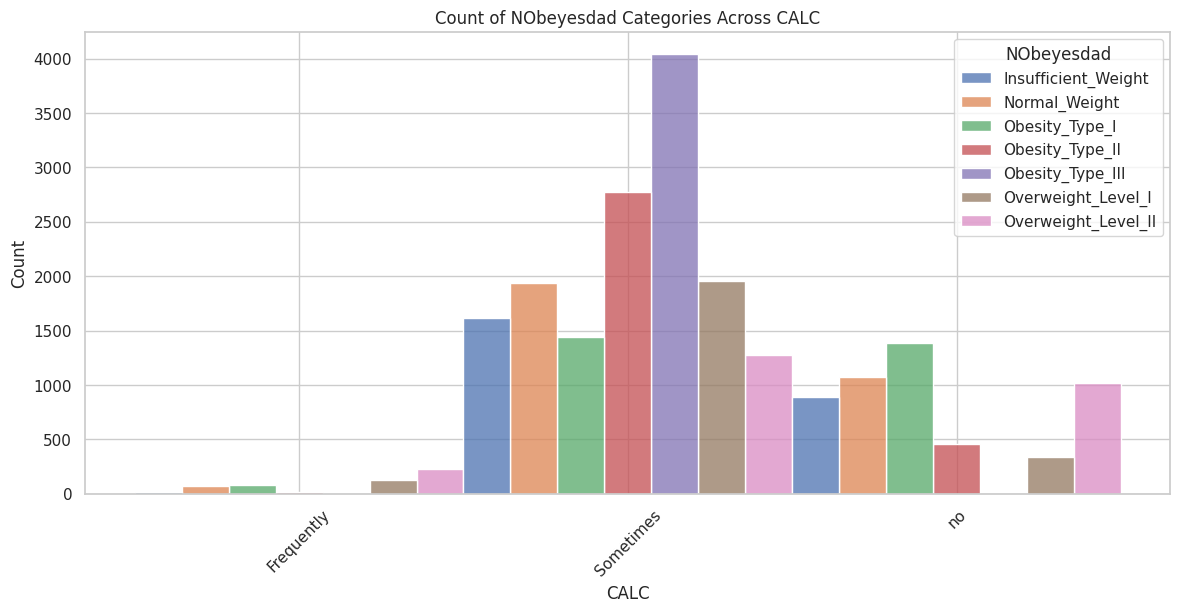

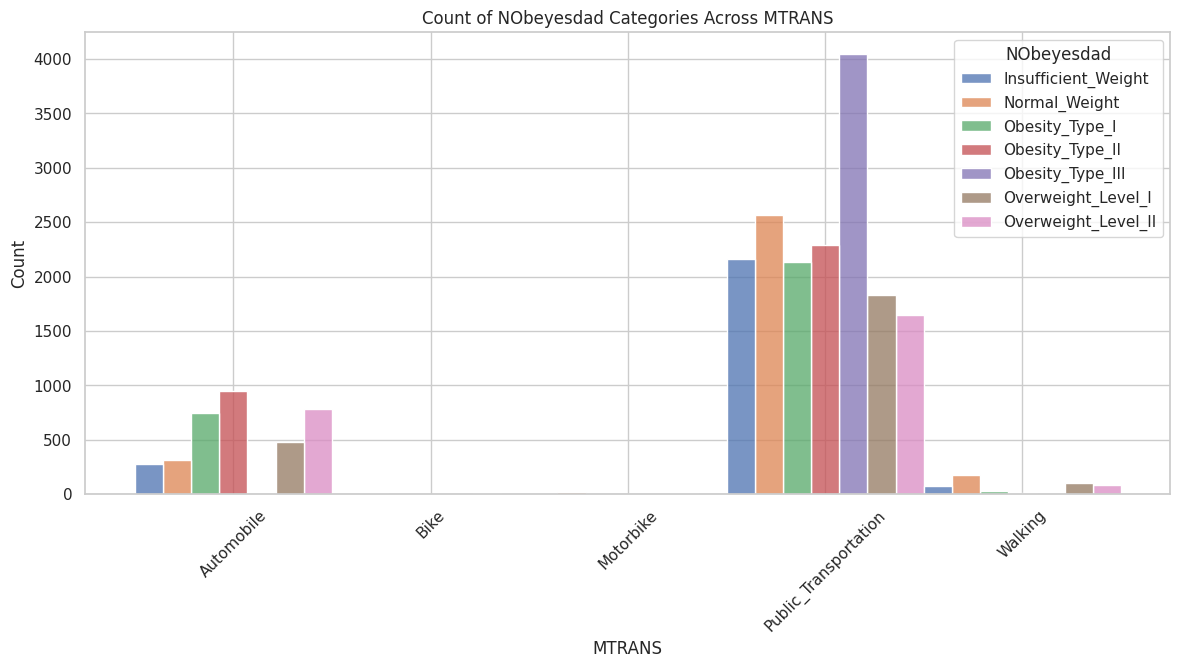

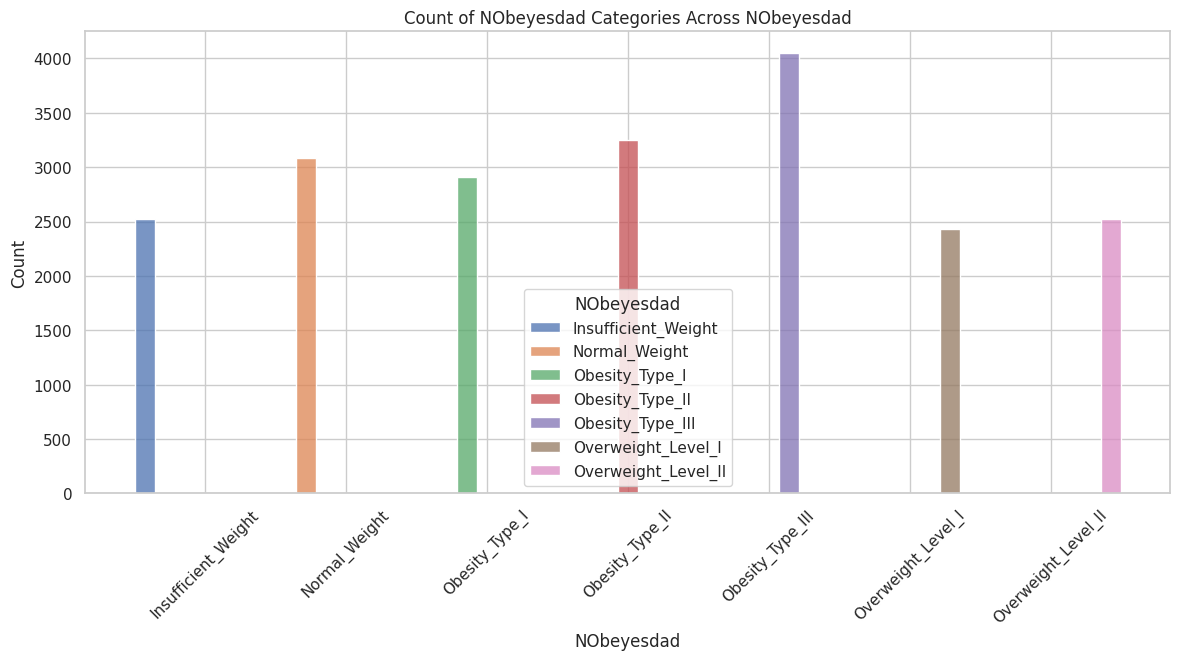

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get list of categorical features (excluding target variable)
categorical_features = Churn_train_df.select_dtypes(include=['category']).columns.tolist()

# Loop through each categorical feature
for feature in categorical_features:
    # Plot histogram
    plt.figure(figsize=(14, 6))
    sns.histplot(data=Churn_train_df, x=feature, hue='NObeyesdad', multiple='dodge', stat='count', bins='auto', element='bars', legend=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Count of NObeyesdad Categories Across {feature}')
    plt.xticks(rotation=45)
    plt.show()
